In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
sns.set_context('poster', font_scale=1.25)

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from LB_D2Q9 import pipe_cython as lb

We now want to visualize the evolution of the flow...let's see how it goes...

In [6]:
from IPython import display

It's probably easier to specify dt and dr and the dimensions. Then get everything else from that...yeah. That way the velocity is on the scale of U ~ 0.1 or so.

In [7]:
#### Input to the simulation in SI. ######
diameter = 1. # meters
length = 10. # meters

deltaP = 0.

dr = 0.01
dt = .025


viscosity = 10.**-6. # More viscous = easier to simulate!


##### Derived parameters ######
print 'Desired viscosity:' , viscosity
#Re = (input_velocity * diameter)/viscosity
#print 'Desired Re', Re

# Re is set by diameter, input_velocity, and viscosity
# Adjust dr so that mach number doers not explode!
print
print '###### Simulation Parameters #########'
print

# Solve for the desired omega...make sure it's in the correct range.


ly = int(np.ceil(diameter/dr))
lx = int(np.ceil(length/dr))
print 'ly', ly
print 'lx', lx

omega = .5 + (3*dt*viscosity)/(dr**2)

print 'omega:' , omega

assert (omega > 0.5) and (omega < 1)

sim = lb.Pipe_Flow(lx=lx, ly=ly, dr=dr, dt=dt, omega=omega, 
                   deltaP=deltaP)

# U should be on the order of 0.1, 0.2 in the simulation!
#print 'u_max in simulation:' , np.max(sim.u)

Desired viscosity: 1e-06

###### Simulation Parameters #########

ly 100
lx 1000
omega: 0.50075
Viscosity: 1e-06
Re: None
Ma: None


Oh wow, the mach number is *way* too high. Let's do a simulation in meters...

<matplotlib.colorbar.Colorbar instance at 0x7f42064e7d88>

/home/bryan/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


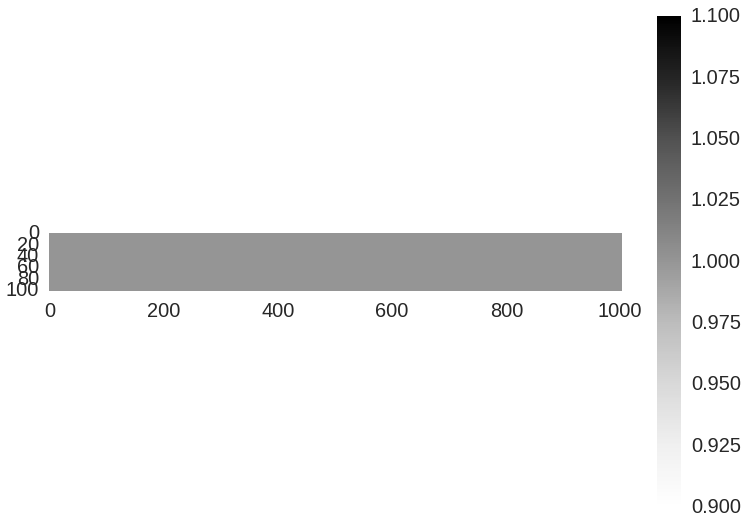

In [8]:
plt.imshow(sim.rho.T)
plt.grid(False)
plt.colorbar()

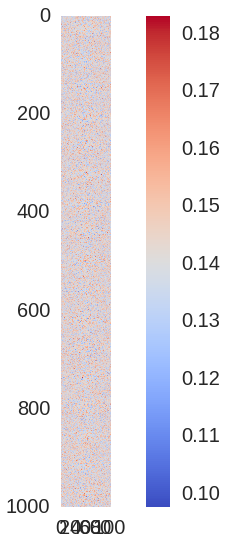

191.008
192.346
193.693
195.049
196.414
197.787
199.17
200.562
201.963
203.373
204.792
206.221
207.658
209.106
210.563
212.029
213.505
214.991
216.486
217.991
219.506
221.031
222.565
224.11
225.665
227.23
228.805
230.391
231.986
233.593
235.209
236.837
238.474
240.123
241.782
243.452
245.133
246.825
248.527
250.241
251.966
253.702
255.45
257.209
258.979
260.761
262.554
264.359
266.175
268.004
269.844
271.696
273.56
275.436
277.325
279.225
281.138
283.063
285.001
286.951
288.914
290.89
292.878
294.879
296.893
298.92
300.96
303.014
305.08
307.16
309.253
311.36
313.48
315.614
317.762
319.923
322.099
324.288
326.492
328.71
330.942
333.188
335.449
337.724
340.014
342.319
344.638
346.972
349.322
351.686
354.065
356.46
358.87
361.296
363.737
366.194
368.666
371.155
373.659
376.179


In [ ]:
total_num_steps = 1000
steps_per_image= 100

num_to_record = int(np.ceil(float(total_num_steps)/steps_per_image))

plt.figure()
for i in range(num_to_record):
    mag = np.sqrt(sim.u**2 + sim.v**2)
    plt.imshow(mag, cmap = cm.coolwarm)
    plt.grid(False)
    #plt.clim(vmin=0, vmax=1.)
    if i == 0:
        plt.colorbar()
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
    sim.run(steps_per_image)
plt.clf() # This way a second figure does not appear at the end...

Cool. Let's say that we have constant input on the left and constant output on the right. Well, perhaps we could try to study an obstacle...that would be cool. Well...let's think. What next? We could start writing the slow pieces in opencl...